In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ad1026858\AppData\Local\Programs\Python\Python35\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = input_data.read_data_sets('./dataset/input_data/', one_hot=True)

Extracting ./dataset/input_data/train-images-idx3-ubyte.gz
Extracting ./dataset/input_data/train-labels-idx1-ubyte.gz
Extracting ./dataset/input_data/t10k-images-idx3-ubyte.gz
Extracting ./dataset/input_data/t10k-labels-idx1-ubyte.gz


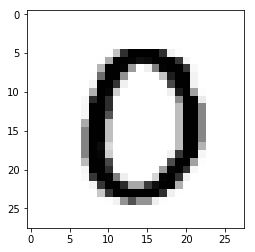

In [3]:
plt.imshow(mnist.train.images[10].reshape(28,28), cmap='Greys')

In [4]:
# Generator Function
def generator(z, reuse=None):
    # Variable Scope
    # Goal: To have modular sections or subsets of parameters
    with tf.variable_scope('gen', reuse=reuse):
        # Hidden Layer 1
        h1 = tf.layers.dense(z, units=128)
        
        # Leaky ReLu
        alpha = 0.01
        h1 = tf.maximum(alpha * h1, h1)
        
        # Hidden Layer 2
        h2 = tf.layers.dense(h1, units=128)
        h2 = tf.maximum(alpha * h2, h2)
        
        out = tf.layers.dense(h2, units=784, activation=tf.nn.tanh)
        
        return out

In [5]:
# Generator Function
def discriminator(X, reuse=None):
    # Variable Scope
    # Goal: To have modular sections or subsets of parameters
    with tf.variable_scope('dis', reuse=reuse):
        # Hidden Layer 1
        h1 = tf.layers.dense(X, units=128)
        
        # Leaky ReLu
        alpha = 0.01
        h1 = tf.maximum(alpha * h1, h1)
        
        # Hidden Layer 2
        h2 = tf.layers.dense(h1, units=128)
        h2 = tf.maximum(alpha * h2, h2)
        
        # Output Layer
        logits = tf.layers.dense(h2, units=1)
        out = tf.sigmoid(logits)
        
        return out, logits

In [6]:
# Placeholders
input_images = tf.placeholder(tf.float32, shape=[None, 784])
z = tf.placeholder(tf.float32, shape=[None, 100])

In [7]:
Gen = generator(z)

In [8]:
Dis_out, Dis_logits = discriminator(input_images)

In [9]:
Dis_fake_img, Dis_fake_logits = discriminator(Gen, reuse=True) 

In [10]:
# Loss Function
def loss_func(logits, labels):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=labels))

In [11]:
D_real_loss = loss_func(Dis_logits, tf.ones_like(Dis_logits)*0.9)
D_fake_loss = loss_func(Dis_fake_logits, tf.zeros_like(Dis_logits))

In [12]:
D_loss = D_real_loss + D_fake_loss

In [13]:
G_loss = loss_func(Dis_fake_logits, tf.ones_like(Dis_fake_logits))

In [14]:
lr = 0.001

In [15]:
tvars = tf.trainable_variables()

g_vars = [var for var in tvars if 'gen' in var.name]
d_vars = [var for var in tvars if 'dis' in var.name]

In [16]:
Dis_opt = tf.train.AdamOptimizer(lr).minimize(D_loss, var_list=d_vars)

In [17]:
Gen_opt = tf.train.AdamOptimizer(lr).minimize(G_loss, var_list=g_vars)

In [18]:
batch_size = 128
epochs = 500

In [19]:
init = tf.global_variables_initializer()

In [20]:
samples = []

In [21]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(epochs):
        num_batches = mnist.train.num_examples // batch_size
        
        for n in range(num_batches):
            batch = mnist.train.next_batch(batch_size)
            
            batch_img = batch[0].reshape((batch_size, 784))
            batch_img = batch_img * 2 - 1
            
            batch_z = np.random.uniform(-1,1,size=(batch_size, 100))
            
            _ = sess.run(Dis_opt, feed_dict={input_images: batch_img, z:batch_z})
            _ = sess.run(Gen_opt, feed_dict={z:batch_z})
            
        print('EPOCH: {}'.format(i))
        
        sample_z = np.random.uniform(-1,1,size=(1,100))
        gen_sample = sess.run(generator(z, reuse=True), feed_dict={z: sample_z})
        samples.append(gen_sample)

EPOCH: 0
EPOCH: 1
EPOCH: 2
EPOCH: 3
EPOCH: 4
EPOCH: 5
EPOCH: 6
EPOCH: 7
EPOCH: 8
EPOCH: 9
EPOCH: 10
EPOCH: 11
EPOCH: 12
EPOCH: 13
EPOCH: 14
EPOCH: 15
EPOCH: 16
EPOCH: 17
EPOCH: 18
EPOCH: 19
EPOCH: 20
EPOCH: 21
EPOCH: 22
EPOCH: 23
EPOCH: 24
EPOCH: 25
EPOCH: 26
EPOCH: 27
EPOCH: 28
EPOCH: 29
EPOCH: 30
EPOCH: 31
EPOCH: 32
EPOCH: 33
EPOCH: 34
EPOCH: 35
EPOCH: 36
EPOCH: 37
EPOCH: 38
EPOCH: 39
EPOCH: 40
EPOCH: 41
EPOCH: 42
EPOCH: 43
EPOCH: 44
EPOCH: 45
EPOCH: 46
EPOCH: 47
EPOCH: 48
EPOCH: 49
EPOCH: 50
EPOCH: 51
EPOCH: 52
EPOCH: 53
EPOCH: 54
EPOCH: 55
EPOCH: 56
EPOCH: 57
EPOCH: 58
EPOCH: 59
EPOCH: 60
EPOCH: 61
EPOCH: 62
EPOCH: 63
EPOCH: 64
EPOCH: 65
EPOCH: 66
EPOCH: 67
EPOCH: 68
EPOCH: 69
EPOCH: 70
EPOCH: 71
EPOCH: 72
EPOCH: 73
EPOCH: 74
EPOCH: 75
EPOCH: 76
EPOCH: 77
EPOCH: 78
EPOCH: 79
EPOCH: 80
EPOCH: 81
EPOCH: 82
EPOCH: 83
EPOCH: 84
EPOCH: 85
EPOCH: 86
EPOCH: 87
EPOCH: 88
EPOCH: 89
EPOCH: 90
EPOCH: 91
EPOCH: 92
EPOCH: 93
EPOCH: 94
EPOCH: 95
EPOCH: 96
EPOCH: 97
EPOCH: 98
EPOCH: 99
EPOCH: 100

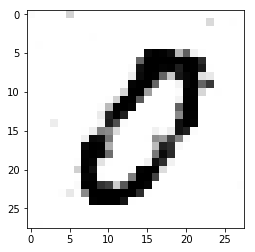

In [23]:
plt.imshow(samples[499].reshape(28,28), cmap='Greys')

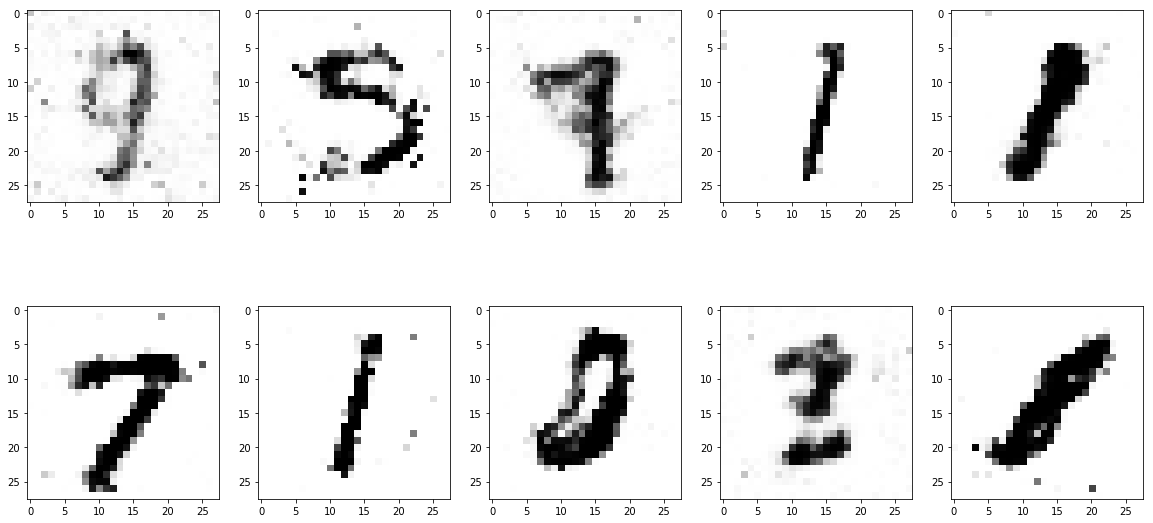

In [24]:
# Plot Generated Images
n = np.random.randint(0,499,10)

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
u = 0
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(samples[n[u]].reshape(28,28), cmap='Greys')
        u +=1 